# Resultado de la ronda en función del número de supervivientes

Bibliotecas necesarias para la ejecución

In [4]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [7]:
# Conexión bbdd esea
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de queries de extracción de datos

In [13]:
query_planted = "select A.ct_alive,A.t_alive,A.is_bomb_planted,A.ct_alive+' vs '+A.t_alive as 'LABEL',[COUNTER WINS],[TERROR WINS],cast(100.0*[COUNTER WINS]/([COUNTER WINS]+[TERROR WINS]) as decimal(4,2)) as '% counter wins',cast(100.0*[TERROR WINS]/([COUNTER WINS]+[TERROR WINS]) as decimal(4,2)) as '% terror wins' from victorias_ct A join victorias_t B on A.ct_alive=B.ct_alive and A.t_alive=B.t_alive and A.is_bomb_planted=B.is_bomb_planted where A.is_bomb_planted = 1 order by [% terror wins]"
query_no_planted = "select A.ct_alive,A.t_alive,A.is_bomb_planted,A.ct_alive+' vs '+A.t_alive as 'LABEL',[COUNTER WINS],[TERROR WINS],cast(100.0*[COUNTER WINS]/([COUNTER WINS]+[TERROR WINS]) as decimal(4,2)) as '% counter wins',cast(100.0*[TERROR WINS]/([COUNTER WINS]+[TERROR WINS]) as decimal(4,2)) as '% terror wins' from victorias_ct A join victorias_t B on A.ct_alive=B.ct_alive and A.t_alive=B.t_alive and A.is_bomb_planted=B.is_bomb_planted where A.is_bomb_planted = 0 order by [% terror wins]"

Carga de datos en dataframes

In [14]:
data_planted = pd.read_sql_query(query_planted, cnxn)
data_no_planted = pd.read_sql_query(query_no_planted, cnxn)

#### Caso con la bomba no plantada

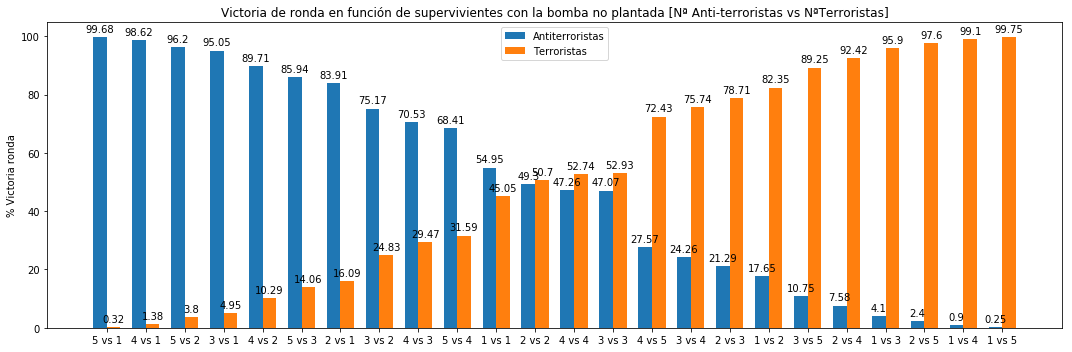

In [165]:
labels = data_no_planted['LABEL']
terror_means = data_no_planted['% terror wins']
ct_means = data_no_planted['% counter wins']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ct_means, width, label='Antiterroristas')
rects2 = ax.bar(x + width/2, terror_means, width, label='Terroristas')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Victoria ronda')
ax.set_title('Victoria de ronda en función de supervivientes con la bomba no plantada [Nª Anti-terroristas vs NªTerroristas]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


#### Caso con la bomba plantada

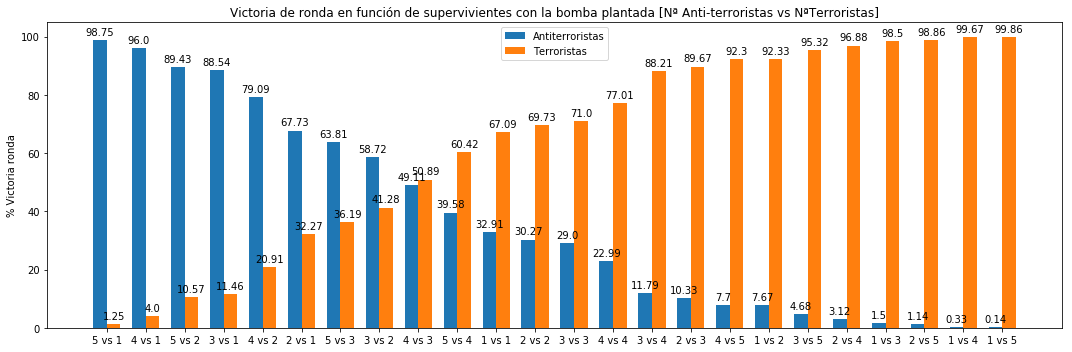

In [160]:
labels = data_planted['LABEL']
terror_means = data_planted['% terror wins']
ct_means = data_planted['% counter wins']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ct_means, width, label='Antiterroristas')
rects2 = ax.bar(x + width/2, terror_means, width, label='Terroristas')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Victoria ronda')
ax.set_title('Victoria de ronda en función de supervivientes con la bomba plantada [Nª Anti-terroristas vs NªTerroristas]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
